### Gaussian模糊+Laplacian锐化+Canny图像检测（deprecated）

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
src_path = "fakepath/"

In [3]:
def draw(image_mat):
    plt.imshow(image_mat)
    plt.show()
    #save
    plt.close()

In [4]:
def edge_detection(min_th,max_th):
    for _, _, files in os.walk(src_path):
        files.sort()
        for name in files:
            img_path = src_path + name
            image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            image = cv2.GaussianBlur(image,(3,3),sigmaX = 1)
            laplace_mask = cv2.convertScaleAbs(cv2.Laplacian(image, cv2.CV_32F, ksize = 3))
            image_enhanced = cv2.convertScaleAbs(cv2.addWeighted(image, 1, laplace_mask, -1, 0, dtype=cv2.CV_32F))
            canny_mask = cv2.Canny(image_enhanced, min_th, max_th)
            draw(canny_mask)

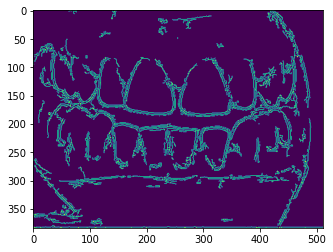

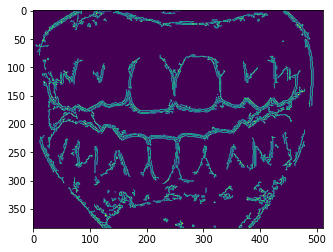

In [5]:
edge_detection(50,150)